### Second-Hand Cars Analysis (Hyderabad) – Cars24

### Introduction

- This project analyzes used car listings in Hyderabad to understand key factors influencing resale price.                                                                
- The data was collected through web scraping from Cars24.
- This analysis can help dealers and buyers make better pricing decisions.

### Problem Statement
- The objective of this project is to perform Exploratory Data Analysis (EDA) on second-hand car listings in Hyderabad collected from Cars24.                                    
- The primary target variable is Price, and the goal is to analyze how features such as Year, KM Driven, Fuel Type, Transmission, Ownership, and Brand influence resale value.   
- This analysis aims to derive meaningful insights about pricing patterns and market behavior in the Hyderabad used-car market.

### Tools & Technologies Used
- Jupyter Notebook
- Requests                                                                                
- Pandas                                                                                  
- Matplotlib                                                                              
- Seaborn 

### Data Collection (Web Scraping)
Step 1: Identify API

Using:

- Inspect → Network → XHR

- Found API endpoint:

https://car-catalog-gateway-in.c24.tech/listing/v1/buy-used-cars-hyderabad

Step 2: Scraping Code

- Pagination handled using searchAfter key

In [11]:
import requests
import pandas as pd
import time

url = "https://car-catalog-gateway-in.c24.tech/listing/v1/buy-used-cars-hyderabad"

headers = {
    "accept": "application/json, text/plain, */*",
    "content-type": "application/json",
    "origin": "https://www.cars24.com",
    "referer": "https://www.cars24.com/",
    "user-agent": "Mozilla/5.0",
    "x_tenant_id": "INDIA_CAR_LISTING",
    "x_user_city_id": "3686"
}

payload = {
    "searchFilter": [],
    "cityId": "3686",
    "sort": "bestmatch",
    "size": 100,
    "filterVersion": 4
}

all_rows = []
search_after = None

while True:

    if search_after:
        payload["searchAfter"] = search_after
    else:
        payload.pop("searchAfter", None)

    response = requests.post(url, json=payload, headers=headers)
    data = response.json()

    cars = data.get("content", [])

    if not cars:
        break

    for car in cars:
        all_rows.append({
            "Name": car.get("carName"),
            "Brand": car.get("make"),
            "Model": car.get("model"),
            "Year": car.get("year"),
            "KM Driven": car.get("odometer", {}).get("value"),
            "Fuel": car.get("fuelType"),
            "Transmission": car.get("transmissionType", {}).get("display"),
            "Ownership": car.get("ownership"),
            "Price": car.get("listingPrice"),
            "Location": car.get("address", {}).get("locality")
        })

    last_car = cars[-1]
    search_after = [last_car["score"], last_car["appointmentId"]]

    time.sleep(1)

#df = pd.DataFrame(all_rows)
#df.to_csv("cars24_data.csv", index=False)

print("!! Collected Successfully !!")

!! Collected Successfully !!


In [13]:
df.shape

(1715, 10)

- Total Listings Scraped: 1715

### Data Cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          1715 non-null   object
 1   Brand         1715 non-null   object
 2   Model         1715 non-null   object
 3   Year          1715 non-null   int64 
 4   KM Driven     1715 non-null   int64 
 5   Fuel          1715 non-null   object
 6   Transmission  1715 non-null   object
 7   Ownership     1715 non-null   int64 
 8   Price         1715 non-null   int64 
 9   Location      1715 non-null   object
dtypes: int64(4), object(6)
memory usage: 134.1+ KB


In [5]:
df.isnull().sum()

Name            0
Brand           0
Model           0
Year            0
KM Driven       0
Fuel            0
Transmission    0
Ownership       0
Price           0
Location        0
dtype: int64

- No missing values were found in the dataset.

In [16]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.head()

,Name,Brand,Model,Year,KM Driven,Fuel,Transmission,Ownership,Price,Location
0,Datsun Redi Go,Datsun,Redi Go,2017,35257,Petrol,Manual,2,141000,"Kompally, Hyderabad"
1,Hyundai AURA,Hyundai,AURA,2023,120141,CNG,Manual,1,575000,"Bachupally, Hyderabad"
2,Honda Jazz,Honda,Jazz,2017,31267,Petrol,Manual,1,472341,"GVK One Mall, Banjara Hills, Hyderabad, Telang..."
3,Hyundai i10,Hyundai,i10,2013,65984,Petrol,Manual,2,200000,"Kompally, Hyderabad"
4,Maruti A Star,Maruti,A Star,2013,93352,Petrol,Manual,2,195918,"Kompally, Hyderabad"


In [29]:
df.describe()

,Year,KM Driven,Ownership,Price
count,1715.000000,1.715000e+03,1715.000000,1.715000e+03
mean,2017.508455,8.685606e+04,1.483382,6.532446e+05
std,3.771835,8.282502e+04,0.682451,6.793916e+05
min,2010.000000,1.000000e+00,1.000000,3.900000e+04
25%,2014.000000,4.876500e+04,1.000000,2.980000e+05
50%,2018.000000,7.771400e+04,1.000000,4.790000e+05
75%,2021.000000,1.104080e+05,2.000000,7.810000e+05
max,2025.000000,1.920000e+06,8.000000,1.050000e+07


In [7]:
df.sort_values("Price", ascending=False).head()

,Name,Brand,Model,Year,KM Driven,Fuel,Transmission,Ownership,Price,Location
1539,Mercedes Benz GLS,Mercedes Benz,GLS,2022,20907,Diesel,Auto,1,10500000,Sanjeeva Reddy Nagar Hyderabad Telangana
1601,Porsche Cayenne,Porsche,Cayenne,2021,32740,Petrol,Auto,2,8148000,Hyderabad Telangana India
1624,Mercedes Benz S Class,Mercedes Benz,S Class,2019,23500,Petrol,Auto,2,7600000,Sainikpuri Sainikpuri Hyderabad
1565,Audi Q7,Audi,Q7,2023,15983,Petrol,Auto,1,7210000,Kantha Reddy Nagar Hyderabad Telangana
1590,Audi Q5,Audi,Q5,2022,38290,Petrol,Auto,1,7140000,Silpa Gram Craft Village Hyderabad Telangana


In [8]:
df.sort_values("KM Driven", ascending=False).head()

,Name,Brand,Model,Year,KM Driven,Fuel,Transmission,Ownership,Price,Location
1242,MG HECTOR,MG,HECTOR,2020,1920000,Diesel,Manual,1,900000,Venkata Sai Colony Upperpally Telangana
1519,MG HECTOR,MG,HECTOR,2021,1760000,Diesel,Manual,1,1150000,Lecturers Colony Hyderabad
893,Tata Indica Vista,Tata,Indica Vista,2011,1354000,Diesel,Manual,2,90000,Hyderabad Telangana India
1108,Mahindra XUV500,Mahindra,XUV500,2012,327672,Diesel,Manual,1,385000,Gayathri nagar Gayathri nagar Hyderabad
1447,Toyota Innova,Toyota,Innova,2014,312500,Diesel,Manual,2,704000,Telangana India Bharath petrol pump


In [32]:
df["Ownership"].value_counts()

Ownership
1    1014
2     606
3      76
4      11
5       5
6       1
8       1
7       1
Name: count, dtype: int64

In [35]:
df = df[df["KM Driven"] <= 500000]

In [36]:
df = df[df["Ownership"] <= 4]

In [37]:
df.shape

(1704, 10)

In [39]:
#df.to_csv("cars24_cleaned_data.csv", index=False)

- After removing extreme mileage and unrealistic ownership values, 1704 records were used for final analysis.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [41]:
df["Price"].describe()

count    1.704000e+03
mean     6.541722e+05
std      6.807763e+05
min      3.900000e+04
25%      3.000000e+05
50%      4.795000e+05
75%      7.800000e+05
max      1.050000e+07
Name: Price, dtype: float64

- The dataset shows that the average resale price is approximately ₹6.5 lakhs.

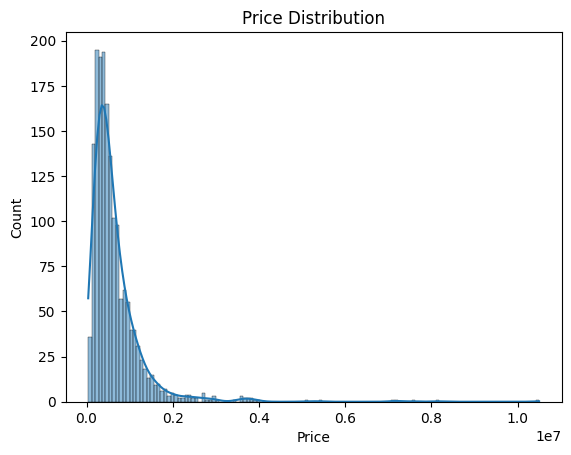

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

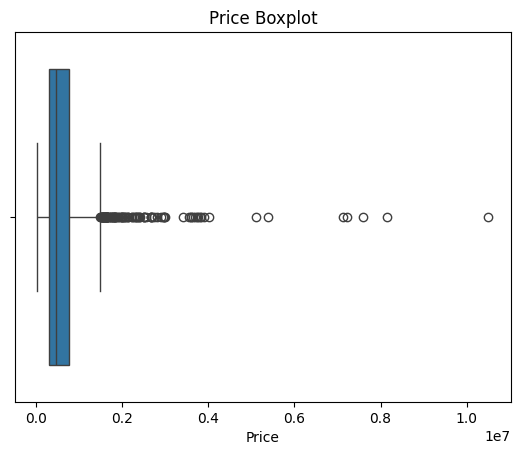

In [43]:
sns.boxplot(x=df["Price"])
plt.title("Price Boxplot")
plt.show()

- The price distribution is right-skewed due to presence of premium luxury vehicles.

In [44]:
df["KM Driven"].describe()

count      1704.000000
mean      83893.926056
std       48160.915773
min           1.000000
25%       48429.250000
50%       77364.000000
75%      109920.500000
max      327672.000000
Name: KM Driven, dtype: float64

- Most cars have mileage between 48,000 km and 1,10,000 km.

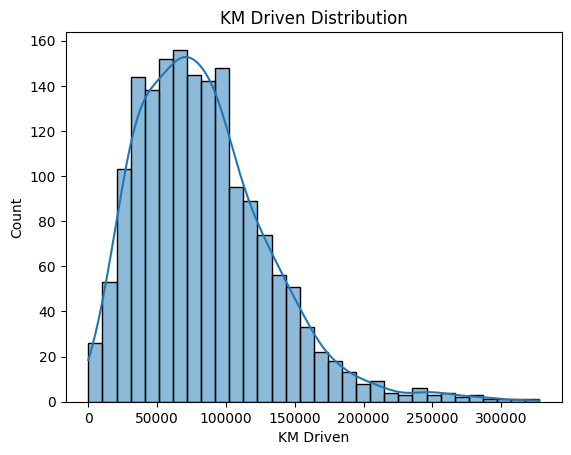

In [45]:
sns.histplot(df["KM Driven"], kde=True)
plt.title("KM Driven Distribution")
plt.show()

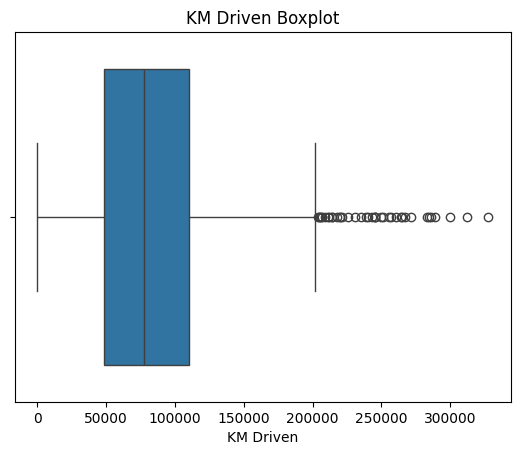

In [46]:
sns.boxplot(x=df["KM Driven"])
plt.title("KM Driven Boxplot")
plt.show()

- Extremely high mileage vehicles were treated as outliers to improve analytical accuracy.

In [47]:
df["Fuel"].value_counts()

Fuel
Petrol      1059
Diesel       618
Electric      20
CNG            7
Name: count, dtype: int64

In [48]:
df["Fuel"].value_counts(normalize=True) * 100

Fuel
Petrol      62.147887
Diesel      36.267606
Electric     1.173709
CNG          0.410798
Name: proportion, dtype: float64

- Petrol vehicles dominate the dataset (≈62%), followed by Diesel (≈36%).

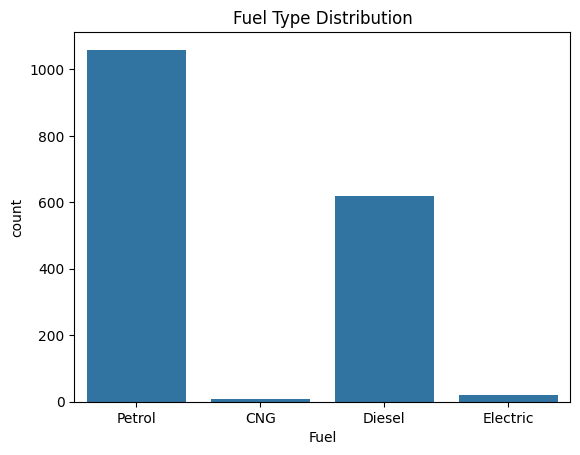

In [49]:
sns.countplot(x="Fuel", data=df)
plt.title("Fuel Type Distribution")
plt.show()

- Electric vehicles, although few in number, show significantly higher median prices.

In [50]:
df["Brand"].value_counts().head(10)

Brand
Maruti        510
Hyundai       313
Tata          158
Honda         102
Mahindra       91
Ford           69
Renault        67
KIA            58
Volkswagen     54
Toyota         44
Name: count, dtype: int64

In [51]:
df["Brand"].value_counts(normalize=True).head(10) * 100

Brand
Maruti        29.929577
Hyundai       18.368545
Tata           9.272300
Honda          5.985915
Mahindra       5.340376
Ford           4.049296
Renault        3.931925
KIA            3.403756
Volkswagen     3.169014
Toyota         2.582160
Name: proportion, dtype: float64

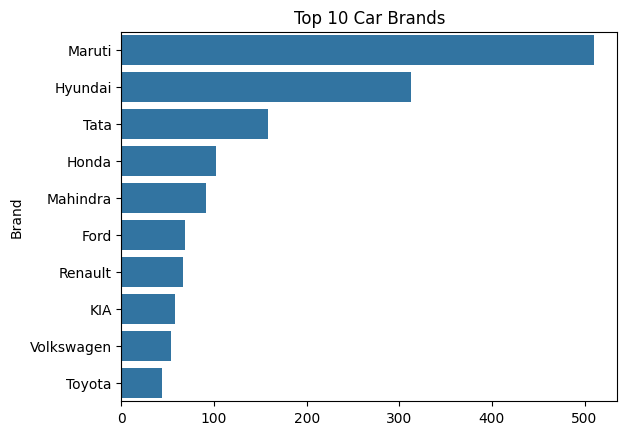

In [52]:
top_brands = df["Brand"].value_counts().head(10)

sns.barplot(x=top_brands.values, y=top_brands.index)
plt.title("Top 10 Car Brands")
plt.show()

- Maruti and Hyundai together account for nearly 48% of total listings, showing strong dominance in Hyderabad’s used car market.

In [53]:
df["Transmission"].value_counts()

Transmission
Manual    1233
Auto       471
Name: count, dtype: int64

In [54]:
df["Transmission"].value_counts(normalize=True) * 100

Transmission
Manual    72.359155
Auto      27.640845
Name: proportion, dtype: float64

- Manual transmission cars dominate the market (~72%), indicating higher availability and demand in the second-hand segment.

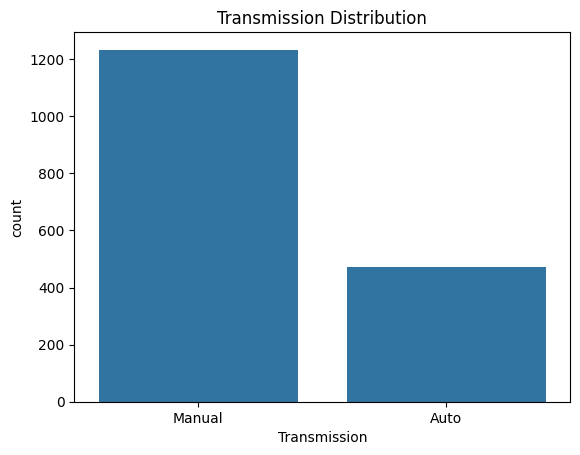

In [55]:
sns.countplot(x="Transmission", data=df)
plt.title("Transmission Distribution")
plt.show()

### Bivariate Analysis

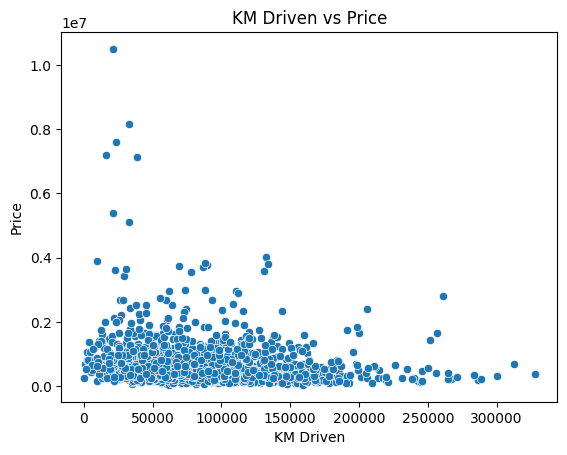

In [56]:
sns.scatterplot(x="KM Driven", y="Price", data=df)
plt.title("KM Driven vs Price")
plt.show()

In [57]:
df[["KM Driven", "Price"]].corr()

,KM Driven,Price
KM Driven,1.000000,-0.159044
Price,-0.159044,1.000000


- A weak negative correlation (-0.16) suggests that higher mileage slightly reduces resale price, but it is not the strongest influencing factor.

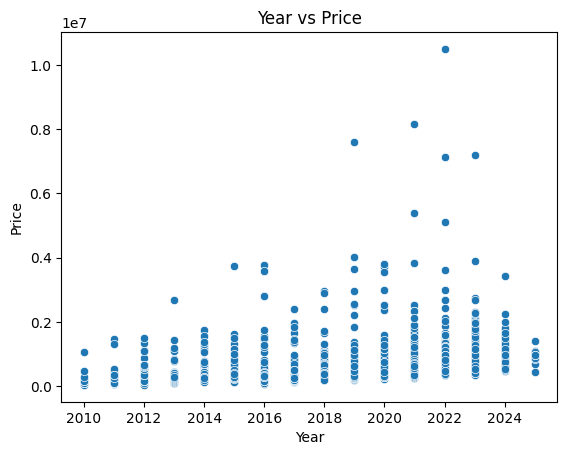

In [58]:
sns.scatterplot(x="Year", y="Price", data=df)
plt.title("Year vs Price")
plt.show()

In [59]:
df[["Year", "Price"]].corr()

,Year,Price
Year,1.000000,0.417262
Price,0.417262,1.000000


- There is a moderate positive correlation (0.42) between Year and Price, indicating that newer cars tend to have higher resale value.

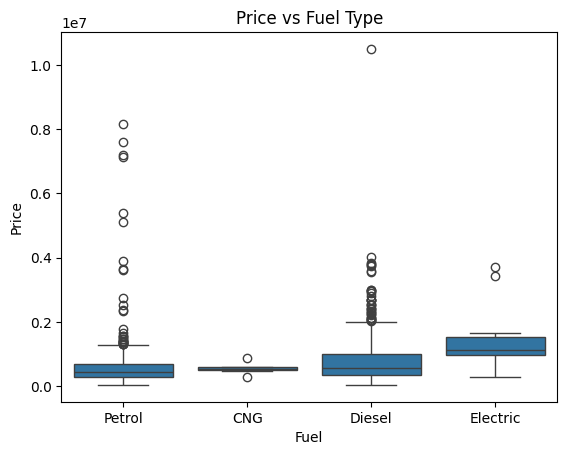

In [60]:
sns.boxplot(x="Fuel", y="Price", data=df)
plt.title("Price vs Fuel Type")
plt.show()

In [61]:
df.groupby("Fuel")["Price"].mean()

Fuel
CNG         5.585946e+05
Diesel      7.956974e+05
Electric    1.331600e+06
Petrol      5.594205e+05
Name: Price, dtype: float64

In [62]:
df.groupby("Fuel")["Price"].median()

Fuel
CNG          550000.0
Diesel       565000.0
Electric    1119000.0
Petrol       439000.0
Name: Price, dtype: float64

- Electric vehicles have the highest median resale price (₹11.19 lakhs), followed by Diesel (₹5.5 lakhs), while Petrol vehicles show lower median resale value (₹4.44 lakhs).

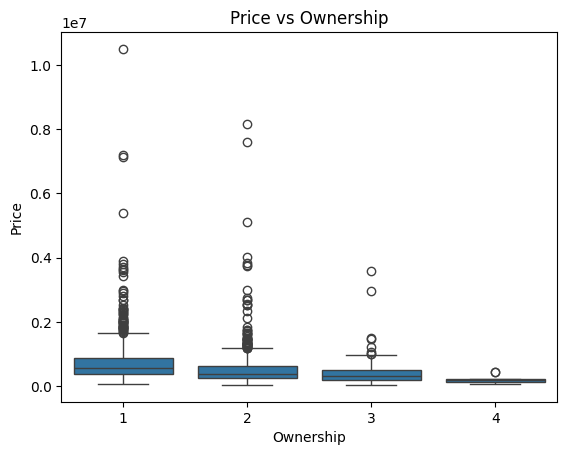

In [63]:
sns.boxplot(x="Ownership", y="Price", data=df)
plt.title("Price vs Ownership")
plt.show()

In [64]:
df.groupby("Ownership")["Price"].mean()

Ownership
1    727997.320158
2    561654.089256
3    472400.960526
4    206636.363636
Name: Price, dtype: float64

In [65]:
df.groupby("Ownership")["Price"].median()

Ownership
1    563140.0
2    384000.0
3    315156.0
4    186000.0
Name: Price, dtype: float64

- Cars with single ownership have significantly higher average resale value compared to multi-owner vehicles.

In [66]:
df[["Year", "KM Driven", "Ownership", "Price"]].corr()

,Year,KM Driven,Ownership,Price
Year,1.000000,-0.484811,-0.378212,0.417262
KM Driven,-0.484811,1.000000,0.220983,-0.159044
Ownership,-0.378212,0.220983,1.000000,-0.138222
Price,0.417262,-0.159044,-0.138222,1.000000


In [67]:
pd.crosstab(df["Fuel"], df["Transmission"])

Transmission,Auto,Manual
Fuel,,
CNG,0,7
Diesel,158,460
Electric,20,0
Petrol,293,766


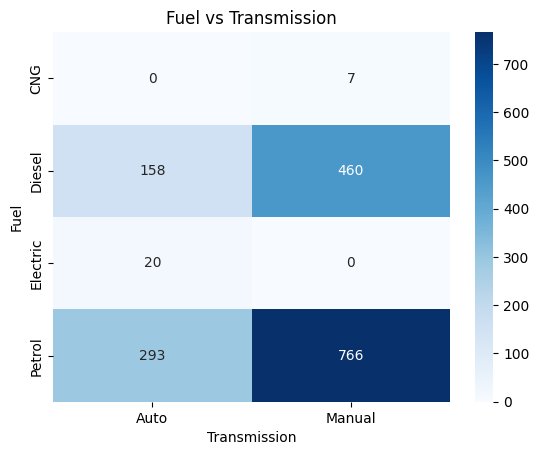

In [68]:
sns.heatmap(
    pd.crosstab(df["Fuel"], df["Transmission"]),
    annot=True,
    cmap="Blues",
    fmt="d"
)
plt.title("Fuel vs Transmission")
plt.show()

- Diesel & Petrol both Manual dominant

- Electric fully Automatic

- CNG mostly Manual

### Multivariate

Average Price by Fuel & Transmission :

In [9]:
pd.pivot_table(df, 
               values="Price", 
               index="Fuel", 
               columns="Transmission", 
               aggfunc="mean")

Transmission,Auto,Manual
Fuel,,
CNG,NaN,558594.571429
Diesel,1.455685e+06,567374.907923
Electric,1.331600e+06,NaN
Petrol,8.460173e+05,448730.817708


- Automatic Diesel vehicles show higher average pricing compared to Manual variants.

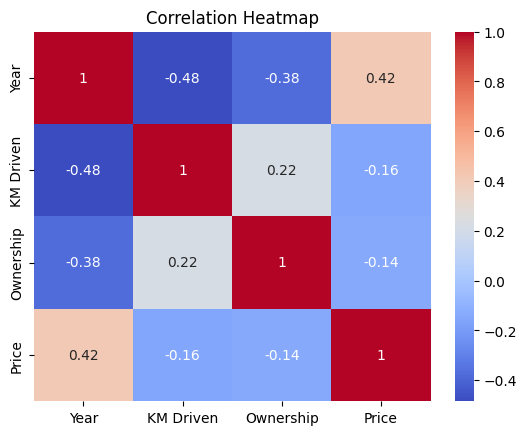

In [69]:
sns.heatmap(
    df[["Year", "KM Driven", "Ownership", "Price"]].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

- Year positively related to Price

- KM negatively related to Year

- Ownership slightly negative to Price

### Key Insights
- Vehicle Year is the strongest pricing factor, showing moderate positive correlation with resale price.

- Single-owner vehicles command significantly higher resale value compared to multi-owner cars.

- Petrol vehicles dominate the Hyderabad market (≈62%), followed by Diesel (≈36%).

- Manual transmission accounts for ~72% of listings, indicating dominance in budget and mid-range segment.

- Electric vehicles represent a small but premium-priced segment.

- Maruti and Hyundai together dominate resale volume, contributing nearly half of total listings.

### Recommendations
- Sellers should position newer model cars competitively, as year strongly influences pricing.

- Budget buyers may focus on manual petrol vehicles, which form the majority of affordable listings.

- Dealerships can gradually increase electric vehicle inventory to target premium buyers.

- Marketing strategies should highlight single-owner vehicles to enhance perceived value.

- Pricing strategies should primarily consider vehicle year and ownership history.

### Conclusion
- Vehicle Year is the strongest determinant of resale price.

- Mileage has a weak negative relationship with price.

- Ownership history moderately impacts resale value.

- Petrol vehicles dominate overall supply in Hyderabad.

- Manual transmission remains preferred in the budget segment.

- Premium brands significantly influence price distribution.

- The Hyderabad used-car market favors newer, single-owner vehicles.

### Future Scope
- Develop a Machine Learning model for price prediction.

- Perform comparative analysis across multiple cities.

- Conduct deeper brand-level resale value analysis.